In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [17]:
# ------------ Analytic Function
def expected_nodes(m,rho):
    if m==2:
        return 1
    else:
        # p = np.prod([1 - rho * m/(m-j) for j in np.arange(0, m/2+1)])
        p = (1-rho)**(m/2) # probability of each half being totally empty
        return 1+2*(1-p)*expected_nodes(m/2,rho)

# ------------ Jacopo's analytic function

def compute_expectation(D, i, M=2):
    if i == 0:
        return 0

    if D == 1:
        return 2**M
    elif 0 < i < 2**D:
        js = np.arange(max(i-2**(D-1), 0), min(2**(D-1), i) + 1)
        # print(i, js)
        ps = np.zeros(len(js))
        for m, j in enumerate(js):
            L = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-i+j)*np.math.factorial(i-j))
            R = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-j)*np.math.factorial(j))
            Den = np.math.factorial(2**D)/(np.math.factorial(2**D-i)*np.math.factorial(i))
            ps[m] = L*R/Den
        # print(ps)
        return 2**M + sum([p * (compute_expectation(D-1, i-j) + compute_expectation(D-1, j)) for j, p in zip(js, ps)])
    elif i == 2**D:
        # print("Found purely positive node %d" % (2**M*(i-1)))
        return 2**M*(i-1)


# ------------ Numerical functions

def sample_vector(m,rho):
    # sample a vector of m iid bernouly r.v. with p=rho
    return np.random.binomial(1,rho,size=(m,1))

def sample_vector_deterministic(m, i):
    tmp = np.zeros((m))
    important_ids = np.random.choice(np.arange(m), i, replace=False)
    tmp[important_ids] = 1
    return tmp


def partition(x, cnt=0):
    # partition if there's at least 1 nnz in each half, and count them
    m = x.size
    if m == 1: 
        return cnt+1
    else:
        xl = x[0:int(m/2)]
        xr = x[int(m/2):]
        
        cnt_1 = 0
        cnt_2 = 0
        if np.sum(xl)>0:
            cnt_1 = partition(xl,cnt)
        if np.sum(xr)>0:
            cnt_2 = partition(xr,cnt)
        
    return 1+cnt_1+cnt_2

def internal_partition(x, cnt=0):
    # partition if there's at least 1 nnz in each half, and count them
    m = x.size
    if m == 2: 
        return cnt+1
    else:
        xl = x[0:int(m/2)]
        xr = x[int(m/2):]
        
        cnt_1 = 0
        cnt_2 = 0
        if np.sum(xl)>0:
            cnt_1 = partition(xl,cnt)
        if np.sum(xr)>0:
            cnt_2 = partition(xr,cnt)
        
    return 1+cnt_1+cnt_2

In [18]:
print(sample_vector_deterministic(8, 1))
print(expected_nodes(8,1), partition(np.ones(8)), internal_partition(np.ones(8)))

[0. 0. 0. 0. 0. 0. 0. 1.]
7.0 15 15


In [4]:

D = 5
m = 2**D
rhos = np.linspace(0,1,50)
finite_rhos = np.arange(0, m+1)
En = rhos*0
En2 = finite_rhos*0
for i in range(rhos.size):
    En[i] = expected_nodes(m,rhos[i])
for i in range(finite_rhos.size):
    En2[i] = compute_expectation(D, i)

In [5]:
rhos = np.linspace(0,1,50)
finite_rhos = np.arange(0, m+1)
reps = 1000

En_num = np.zeros((finite_rhos.size,reps))
for i in finite_rhos:
    for j in range(reps):
        # x = np.random.binomial(1,rhos[i],size = (m))
        x = sample_vector_deterministic(m, i)
        En_num[i,j] = partition(x,0)

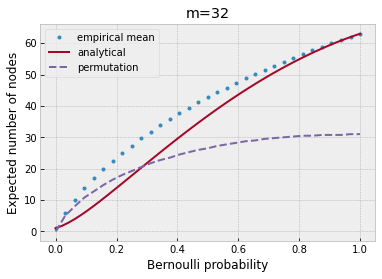

In [6]:
plt.plot(finite_rhos/m,np.mean(En_num,axis=1),'.',label='empirical mean')
plt.plot(rhos,En,label='analytical')
plt.plot(finite_rhos/m, En2/4, '--', label="permutation")
plt.legend()
plt.ylabel('Expected number of nodes')
plt.xlabel('Bernoulli probability')
plt.title("m=%d" % m)
plt.show()

In [7]:
for D in [1, 3, 4, 5, 6, 7, 8]:
    p1 = (1-2/2**D)**(2**(D-1))
    print(D, p1)

1 0.0
3 0.31640625
4 0.34360891580581665
5 0.3560741304517928
6 0.3620552892563166
7 0.36498652424390743
8 0.3664377159220373
